# Support Vector Regressor Implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Lets create synthetic data points
from sklearn.datasets import make_regression

In [3]:
X,y = make_regression(n_samples=1000, n_features=2 , n_targets=1 , noise=3.0)

In [4]:
X

array([[-0.48676812, -0.75138188],
       [-0.28137447, -0.9823481 ],
       [-1.03177221,  0.22839418],
       ...,
       [-1.12801467, -0.03059321],
       [ 0.02098431, -0.96095364],
       [-0.72874935,  1.01038815]])

In [5]:
y

array([-6.90236248e+01, -6.35127447e+01, -6.80848255e+01,  2.61939027e+01,
        6.19657903e+01, -2.15918254e+02,  3.45394502e+01,  5.01221559e+01,
       -9.54126919e+00, -2.59118864e+01, -8.38843017e+01, -3.18526696e+01,
        6.21038836e+01,  3.68052537e+01,  9.15495065e+01, -3.73489904e+01,
        1.26268542e+02, -1.89556592e+01, -2.95812720e+01, -8.76990783e+01,
       -5.42279808e+01,  9.22686411e+01,  5.97276292e+01, -3.52244641e+01,
        8.32036080e+01, -3.20480083e+01,  2.95741870e+01, -1.96538396e+02,
        8.51695931e+01, -4.85134150e+01,  3.11844112e+01,  6.93473207e+01,
        2.61342073e+01,  1.31479695e+02, -6.18679856e+01,  4.63547333e+01,
        2.58268566e+02, -1.27747912e+02,  2.52066122e+01,  4.06810178e+01,
       -3.19782366e+01,  5.92264720e+01, -1.03118662e+01,  2.09935318e+01,
        2.08605533e+01, -8.84989264e+01, -6.92849586e+01, -7.81792274e+01,
       -1.48526811e+02,  4.55021587e+01,  2.30010530e+02, -1.10703452e+01,
       -9.36933820e+01, -

In [7]:
pd.DataFrame(X)[0]

0     -0.486768
1     -0.281374
2     -1.031772
3      0.008224
4      0.452478
         ...   
995    0.133233
996   -0.606265
997   -1.128015
998    0.020984
999   -0.728749
Name: 0, Length: 1000, dtype: float64

<AxesSubplot:xlabel='0', ylabel='1'>

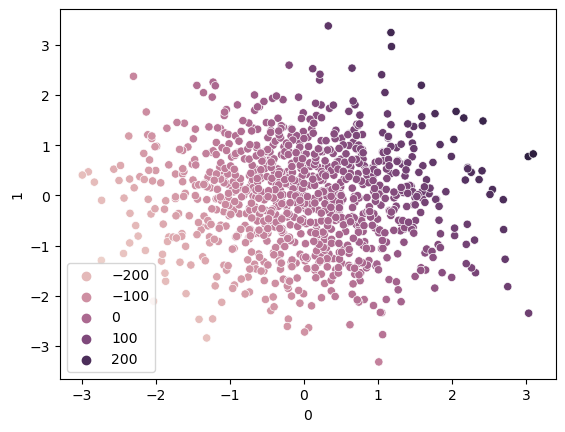

In [9]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1] , hue=y)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X, y , test_size=0.25, random_state=10)

In [14]:
from sklearn.svm import SVR

In [17]:
svr = SVR(kernel ='linear')

In [18]:
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [20]:
svr.coef_

array([[74.97845458, 40.28626173]])

In [23]:
#Prediction

y_pred = svr.predict(X_test)

In [24]:
y_pred

array([-132.41758495,  -54.66433295,  -84.31590856,   92.56657594,
         38.21803885,  -49.59558491, -152.24197261,   11.65844723,
        -28.6808802 ,  -17.44317974,   -8.168173  ,   30.87501904,
       -200.4438018 ,   73.15127691,  -64.45933785,   80.0905709 ,
         -1.83847735,  -74.98148743,  -69.44715509,  -91.11478   ,
        -78.62226223,   50.67365339,  -25.27314451, -129.15553502,
         94.98997125,  124.15774372,  -58.69810553,  -33.809346  ,
         13.35640872, -122.49060302,   63.44182985,  122.70034916,
         82.73403459,   11.55346147,   14.43834034,  103.59372894,
         40.52974742,   45.53909559, -170.35812809,   61.96935889,
        -60.38364182,  -99.71831744,   80.70822192,  -44.02646801,
         49.95507451,  187.60755436,  123.6405344 , -133.42918516,
         32.73599947,  -85.12171011, -196.91604548, -108.61107331,
        -58.83209452,  -27.3739673 ,  -28.82609594,    2.05694815,
         50.91204283,  -38.38465358,  -28.23200883,   60.27934

In [25]:
from sklearn.metrics import r2_score

In [26]:
print(r2_score(y_test,y_pred))

0.9986754468303305


# Hyperparameter Tuning with SVR

In [27]:
from sklearn.model_selection import GridSearchCV

In [37]:
#defining parameter range
param_grid={'C':[0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['linear'],
            'epsilon':[0.1,0.2,0.3]
            
    
}

In [38]:
grid = GridSearchCV(SVR(),param_grid=param_grid , refit=True , cv=5 , verbose=3 )

In [ ]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.789 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.790 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.784 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.797 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.792 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.789 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.790 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.784 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.797 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.792 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

[CV 2/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[C

[CV 4/5] END C=10, epsilon=0.2, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.

[CV 4/5] END C=100, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.2s
[CV 5/5] END C=100, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.2s
[CV 1/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.999 total time=   0.2s
[CV 2/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.999 total time=   0.2s
[CV 3/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.999 total time=   0.2s
[CV 4/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.999 total time=   0.3s
[CV 5/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.999 total time=   0.2s
[CV 1/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   0.2s
[CV 2/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   0.2s
[CV 3/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   0.2s
[CV 4/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   0.2s
[CV

In [35]:
grid.best_params_

{'C': 10, 'epsilon': 0.2, 'gamma': 1, 'kernel': 'linear'}

In [36]:
## Prediction
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9986823120028467
